<a href="https://colab.research.google.com/gist/maya2d26/4d77af52576a99a7749b45f8aa71a64f/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Python és LUA alapokon -  Homework - I. Milestone**


---



### **Group name : * *Rise of AI* ***

Group Members: Tugyi Beatrix (T63K63), El-Ali Maya (BHI5LF), Simkó Máté (O3BMRX)

###**Chosen task: Face Recognition and Generation**
###**Dataset: [FairFace Datset](https://github.com/joojs/fairface)**


---


#**Imports**

In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

import dlib
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
from PIL import Image



---



#**Loading the data**

In [ ]:
# getting the images
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86" -O data.zip && rm -rf /tmp/cookies.txt

--2022-10-20 16:22:06--  https://docs.google.com/uc?export=download&confirm=t&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86
Resolving docs.google.com (docs.google.com)... 108.177.12.113, 108.177.12.101, 108.177.12.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/81scnvlg4i2leoa7jsh8a4hekkos2qak/1666282875000/03161587497725415728/*/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86?e=download&uuid=635a4a15-93b4-4696-a81e-9622b25b655e [following]
--2022-10-20 16:22:07--  https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/81scnvlg4i2leoa7jsh8a4hekkos2qak/1666282875000/03161587497725415728/*/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86?e=download&uuid=635a4a15-93b4-4696-a81e-9622b25b655e
Resolving doc-0g-64-docs.googleusercontent.com (doc-0g-64-docs.googleusercontent.com)... 173.194.211.132,

In [ ]:
# getting the training labels
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH' -O "fairface_label_train.csv"

--2022-10-20 16:22:12--  https://docs.google.com/uc?export=download&id=1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH
Resolving docs.google.com (docs.google.com)... 108.177.12.113, 108.177.12.101, 108.177.12.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/flm4lbftjrrsdq6nhb95j4dhmnnjcihl/1666282875000/03161587497725415728/*/1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH?e=download&uuid=e28ea050-2192-431b-ba8c-d7811cd7066f [following]
--2022-10-20 16:22:13--  https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/flm4lbftjrrsdq6nhb95j4dhmnnjcihl/1666282875000/03161587497725415728/*/1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH?e=download&uuid=e28ea050-2192-431b-ba8c-d7811cd7066f
Resolving doc-04-64-docs.googleusercontent.com (doc-04-64-docs.googleusercontent.com)... 173.194.211.132, 2607:f8b0

In [ ]:
# getting the validation labels
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wOdja-ezstMEp81tX1a-EYkFebev4h7D' -O "fairface_label_val.csv"

--2022-10-20 16:22:14--  https://docs.google.com/uc?export=download&id=1wOdja-ezstMEp81tX1a-EYkFebev4h7D
Resolving docs.google.com (docs.google.com)... 108.177.12.113, 108.177.12.101, 108.177.12.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k2srvq1qqn5jie69gqi0toi8anfkl7nl/1666282875000/03161587497725415728/*/1wOdja-ezstMEp81tX1a-EYkFebev4h7D?e=download&uuid=0ed31971-e0de-47bc-9c59-48111e417323 [following]
--2022-10-20 16:22:14--  https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k2srvq1qqn5jie69gqi0toi8anfkl7nl/1666282875000/03161587497725415728/*/1wOdja-ezstMEp81tX1a-EYkFebev4h7D?e=download&uuid=0ed31971-e0de-47bc-9c59-48111e417323
Resolving doc-08-64-docs.googleusercontent.com (doc-08-64-docs.googleusercontent.com)... 173.194.211.132, 2607:f8b0

##Train labels

### Get the train labels from a csv file, and display the first elements


In [ ]:
train_df = pd.read_csv("fairface_label_train.csv")
train_df.head()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


Delete the last column from the labels, because we do not need that for training 

In [ ]:
train_df = train_df.drop(['service_test'], axis=1)
train_df.head()

,file,age,gender,race
0,train/1.jpg,50-59,Male,East Asian
1,train/2.jpg,30-39,Female,Indian
2,train/3.jpg,3-9,Female,Black
3,train/4.jpg,20-29,Female,Indian
4,train/5.jpg,20-29,Female,Indian


Length of the train labels

In [ ]:
len(train_df)

86744

###Summary of the train label types and the frequency of their appearance

In [ ]:
for col in train_df.loc[:, train_df.columns != "file"] :
  print(train_df[col].value_counts())

20-29           25598
30-39           19250
40-49           10744
3-9             10408
10-19            9103
50-59            6228
60-69            2779
0-2              1792
more than 70      842
Name: age, dtype: int64
Male      45986
Female    40758
Name: gender, dtype: int64
White              16527
Latino_Hispanic    13367
Indian             12319
East Asian         12287
Black              12233
Southeast Asian    10795
Middle Eastern      9216
Name: race, dtype: int64


###Plotting the frequency of the classes



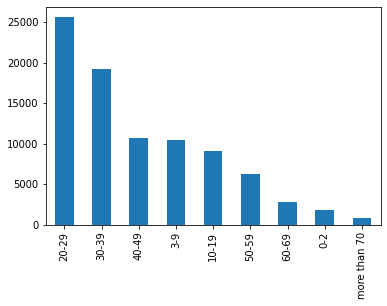

In [ ]:
#ages
fig, ax = plt.subplots()
train_df['age'].value_counts().plot(ax=ax, kind='bar')

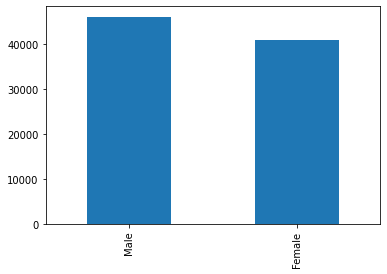

In [ ]:
#gender
fig, ax = plt.subplots()
train_df['gender'].value_counts().plot(ax=ax, kind='bar')

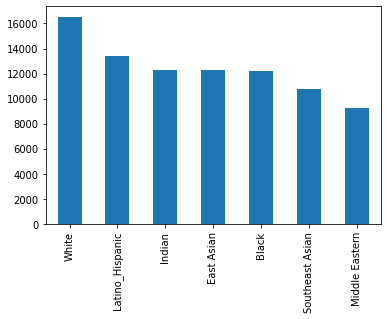

In [ ]:
#race
fig, ax = plt.subplots()
train_df['race'].value_counts().plot(ax=ax, kind='bar')

##Validation labels

### Get the validation labels from a csv file, and display the first elements

In [ ]:
valid_df = pd.read_csv("fairface_label_val.csv")
valid_df.head()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


Delete the last column from the labels, because we do not need that for training 

In [ ]:
valid_df = valid_df.drop(["service_test"], axis = 1)
valid_df.head()

,file,age,gender,race
0,val/1.jpg,3-9,Male,East Asian
1,val/2.jpg,50-59,Female,East Asian
2,val/3.jpg,30-39,Male,White
3,val/4.jpg,20-29,Female,Latino_Hispanic
4,val/5.jpg,20-29,Male,Southeast Asian


Length of the validation labels

In [ ]:
len(valid_df)

10954

###Summary of the validation label types and the frequency of their appearance

In [ ]:
for col in valid_df.loc[:, valid_df.columns != "file"] :
  print(valid_df[col].value_counts())

20-29           3300
30-39           2330
3-9             1356
40-49           1353
10-19           1181
50-59            796
60-69            321
0-2              199
more than 70     118
Name: age, dtype: int64
Male      5792
Female    5162
Name: gender, dtype: int64
White              2085
Latino_Hispanic    1623
Black              1556
East Asian         1550
Indian             1516
Southeast Asian    1415
Middle Eastern     1209
Name: race, dtype: int64


###Plotting the frequency of the classes

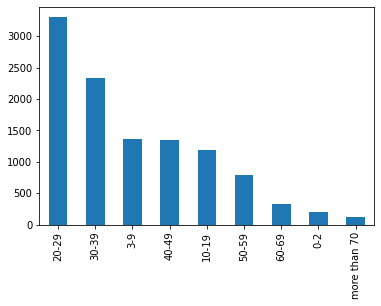

In [ ]:
#ages
fig, ax = plt.subplots()
valid_df['age'].value_counts().plot(ax=ax, kind='bar')

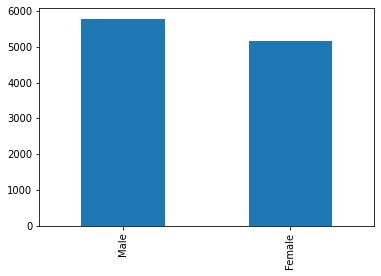

In [ ]:
#gender
fig, ax = plt.subplots()
valid_df['gender'].value_counts().plot(ax=ax, kind='bar')

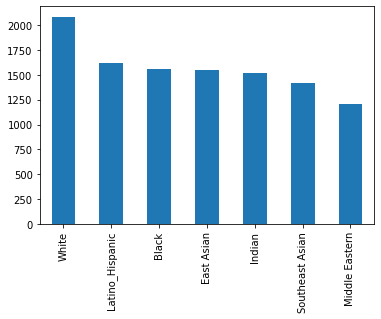

In [ ]:
#race
fig, ax = plt.subplots()
valid_df['race'].value_counts().plot(ax=ax, kind='bar')

## Get the Image datas from FairFace dataset 

In [ ]:
! unzip  *data.zip

Number of train pictures 

In [ ]:
! ls train | wc -l

86744


Number of validation pictures 

In [ ]:
! ls val | wc -l

10954




---



#**Preprocessing**

##Splitting the data into train, test and validation parts

Get the file names for the train datas

In [ ]:
train_x = train_df.loc[:, train_df.columns == "file"]
train_x.head()

,file
0,train/1.jpg
1,train/2.jpg
2,train/3.jpg
3,train/4.jpg
4,train/5.jpg


Get the ground truth labels for the train set

In [ ]:
train_y = train_df.loc[:, train_df.columns != "file"]
train_y.head()

,age,gender,race
0,50-59,Male,East Asian
1,30-39,Female,Indian
2,3-9,Female,Black
3,20-29,Female,Indian
4,20-29,Female,Indian


Split the train data into test and train datasets, in 1: 10 ratio

In [ ]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(train_x, train_y, test_size=0.1, random_state=42, stratify = train_y)

Check the new ratio of the distribution in the train and test files

In [ ]:
for col in y_train_raw.loc[:, y_train_raw.columns != "file"] :
  print(y_train_raw[col].value_counts())

20-29           23040
30-39           17323
40-49            9668
3-9              9367
10-19            8193
50-59            5604
60-69            2503
0-2              1611
more than 70      760
Name: age, dtype: int64
Male      41386
Female    36683
Name: gender, dtype: int64
White              14875
Latino_Hispanic    12029
Indian             11086
East Asian         11059
Black              11011
Southeast Asian     9714
Middle Eastern      8295
Name: race, dtype: int64


In [ ]:
for col in y_test_raw.loc[:, y_test_raw.columns != "file"] :
  print(y_test_raw[col].value_counts())

20-29           2558
30-39           1927
40-49           1076
3-9             1041
10-19            910
50-59            624
60-69            276
0-2              181
more than 70      82
Name: age, dtype: int64
Male      4600
Female    4075
Name: gender, dtype: int64
White              1652
Latino_Hispanic    1338
Indian             1233
East Asian         1228
Black              1222
Southeast Asian    1081
Middle Eastern      921
Name: race, dtype: int64


###Plotting the frequency of the classes

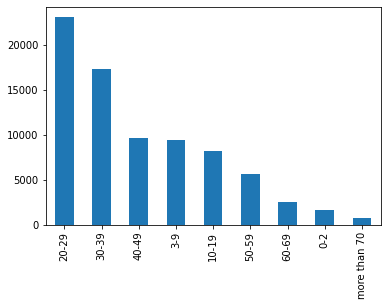

In [ ]:
#ages in train
fig, ax = plt.subplots()
y_train_raw['age'].value_counts().plot(ax=ax, kind='bar')

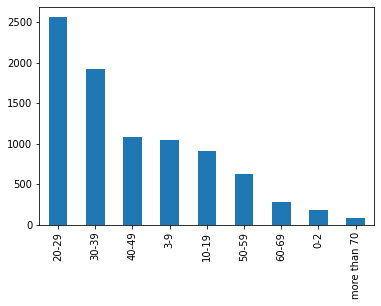

In [ ]:
#ages in test
fig, ax = plt.subplots()
y_test_raw['age'].value_counts().plot(ax=ax, kind='bar')

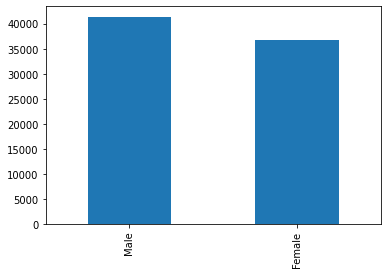

In [ ]:
#gender in train
fig, ax = plt.subplots()
y_train_raw['gender'].value_counts().plot(ax=ax, kind='bar')

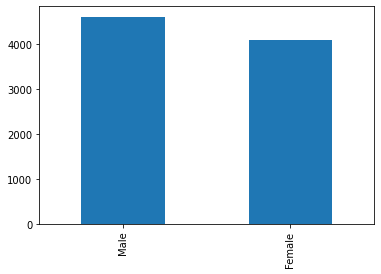

In [ ]:
#gender in test
fig, ax = plt.subplots()
y_test_raw['gender'].value_counts().plot(ax=ax, kind='bar')

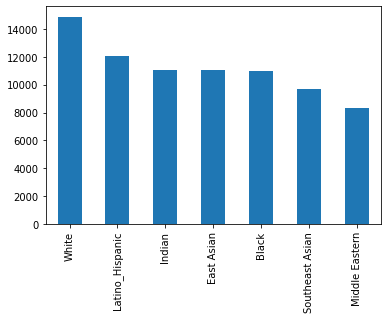

In [ ]:
#race in train
fig, ax = plt.subplots()
y_train_raw['race'].value_counts().plot(ax=ax, kind='bar')

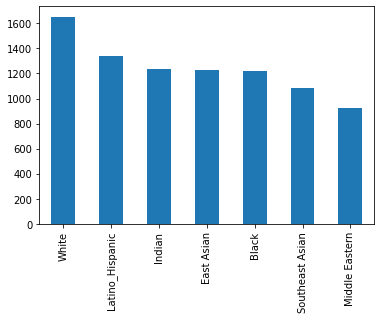

In [ ]:
#race in test
fig, ax = plt.subplots()
y_test_raw['race'].value_counts().plot(ax=ax, kind='bar')

The distribution remains the same between the datasets.

Get the file names for the validation data

In [ ]:
valid_x = valid_df.loc[:, valid_df.columns == "file"]
valid_x.head()

,file
0,val/1.jpg
1,val/2.jpg
2,val/3.jpg
3,val/4.jpg
4,val/5.jpg


Get the ground truth labels for the validation set

In [ ]:
valid_y = valid_df.loc[:, valid_df.columns != "file"]
valid_y.head()

,age,gender,race
0,3-9,Male,East Asian
1,50-59,Female,East Asian
2,30-39,Male,White
3,20-29,Female,Latino_Hispanic
4,20-29,Male,Southeast Asian


##Encoding the data

Function for One-Hot-Encoding the labels

In [ ]:
def one_hot_df(df):
  age = df["age"]
  gender = df["gender"]
  race = df["race"]

  age = pd.get_dummies(age)
  gender = pd.get_dummies(gender)
  race = pd.get_dummies(race)

  return pd.concat([age,gender,race], axis=1)

In [ ]:
Y_train = one_hot_df(y_train_raw)
Y_valid = one_hot_df(valid_y)
Y_test = one_hot_df(y_test_raw)

When creating the test dataset using train_test_split, the indeces were also scrambled, so they need to be renumbered

In [ ]:
X_train = X_train_raw.reset_index(drop=True)
X_valid = valid_x.reset_index(drop=True)
X_test = X_test_raw.reset_index(drop=True)

Now we have the three datasets for validation, test and train.



---



# **Create a DataLoader for the images**

##Defining our own dataset

In [ ]:
class FaceRecognitionDataset(Dataset):  
    def __init__(self, image_ds, label_ds, transform=None):
        self.label_ds = label_ds
        self.ds = image_ds
        self.transform = transform
        
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        img = dlib.load_rgb_image(self.ds["file"][idx])
        img = torchvision.transforms.ToPILImage()(img)
        label = self.label_ds.iloc[idx]
        label = torch.tensor(label)
        if self.transform:
            img = self.transform(img)  
            return img, label

Load the train images into an array

In [ ]:
train_images = []
for i, row in X_train.iloc[:10].iterrows():
  train_images.append(dlib.load_rgb_image(row["file"]))

len(train_images)

10

Check the first image and it's shape

(224, 224, 3)

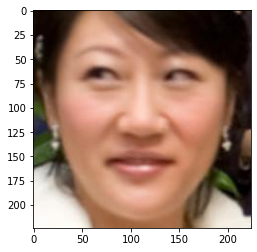

In [ ]:
plt.imshow(train_images[0])
train_images[0].shape

## Trasformation of the Images

On the train set: We Crop, Flip and Rotate
and we transform both the train, test and valid datasets to tensors

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomCrop(200, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),  
])

val_and_test_transform = transforms.Compose([
    transforms.ToTensor(),
])

##Creating the datasets and dataloaders

In [ ]:
train_dataset = FaceRecognitionDataset(X_train, Y_train, train_transform) 
val_dataset = FaceRecognitionDataset(X_valid, Y_valid, val_and_test_transform)
test_dataset = FaceRecognitionDataset(X_test, Y_train, val_and_test_transform)

Checking a random training image and its label

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       dtype=torch.uint8)


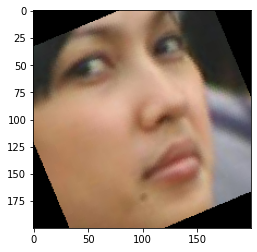

In [ ]:
img, label = train_dataset.__getitem__(17170)
print(label)
plt.imshow(img.cpu().permute(1, 2, 0))

##Visualising a batch

In [ ]:
batch_size = 32
num_workers = 2
train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_dl = DataLoader(val_dataset, batch_size*2, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
def show_batch(dl):
    for image, lb in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(image.cpu(), nrow=8).permute(1,2,0))
        break

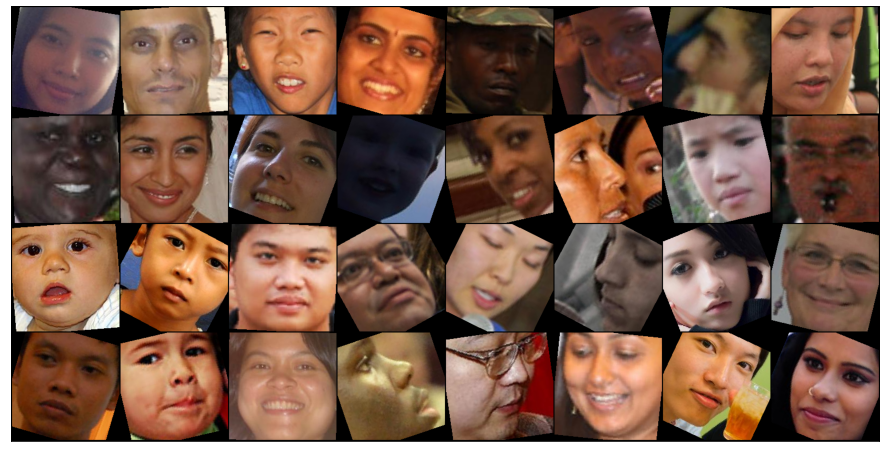

In [ ]:
show_batch(train_dl)